# 혼인건수 프로펫

In [ ]:
import os
import random
import pandas as pd                        
import numpy as np                        
import fbprophet as Prophet

In [ ]:
marriage=pd.read_csv('/content/전국혼인건수81-20.CSV', encoding='cp949')
marriage

,시간,혼인건수
0,1981년01월,49285
1,1981년02월,34481
2,1981년03월,47843
3,1981년04월,35956
4,1981년05월,35769
...,...,...
475,2020년08월,15032
476,2020년09월,15324
477,2020년10월,16473
478,2020년11월,18177


In [ ]:
marriage['시간'] = marriage['시간'].str.replace(pat=r'년', repl=r'-', regex=True)

In [ ]:
marriage['시간'] = marriage['시간'].str.replace(pat=r'월', repl=r'', regex=True)

In [ ]:
marriage['ds']=pd.to_datetime(marriage['시간'], format='%Y-%m-%d')
marriage['y']=marriage['혼인건수']
df=marriage[['ds','y']]
df

,ds,y
0,1981-01-01,49285
1,1981-02-01,34481
2,1981-03-01,47843
3,1981-04-01,35956
4,1981-05-01,35769
...,...,...
475,2020-08-01,15032
476,2020-09-01,15324
477,2020-10-01,16473
478,2020-11-01,18177


In [ ]:
model =  Prophet.Prophet() 
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
past = model.make_future_dataframe(periods=0, freq='M')
future_data = pd.DataFrame(['2021-01-01','2021-02-01'], columns=['ds']).astype( 'datetime64[ns]')
future_data = pd.concat([past,future_data],axis=0)
forecast_data = model.predict(future_data)

In [ ]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,33539.762248,31899.909964,39868.817060,33539.762248,33539.762248,2210.980167,2210.980167,2210.980167,2210.980167,2210.980167,2210.980167,0.0,0.0,0.0,35750.742415
1,1981-02-01,33539.577638,28006.164160,36374.009464,33539.577638,33539.577638,-1261.950386,-1261.950386,-1261.950386,-1261.950386,-1261.950386,-1261.950386,0.0,0.0,0.0,32277.627253
2,1981-03-01,33539.410894,31972.651388,40766.612037,33539.410894,33539.410894,2861.896705,2861.896705,2861.896705,2861.896705,2861.896705,2861.896705,0.0,0.0,0.0,36401.307599
3,1981-04-01,33539.226285,29970.689436,38558.331119,33539.226285,33539.226285,636.065800,636.065800,636.065800,636.065800,636.065800,636.065800,0.0,0.0,0.0,34175.292084
4,1981-05-01,33539.047630,32974.048515,41702.829035,33539.047630,33539.047630,4132.396167,4132.396167,4132.396167,4132.396167,4132.396167,4132.396167,0.0,0.0,0.0,37671.443798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2020-10-01,19815.758185,11791.470832,20204.932459,19815.758185,19815.758185,-3755.294482,-3755.294482,-3755.294482,-3755.294482,-3755.294482,-3755.294482,0.0,0.0,0.0,16060.463703
478,2020-11-01,19748.951018,18609.100174,27061.545131,19748.951018,19748.951018,3002.769405,3002.769405,3002.769405,3002.769405,3002.769405,3002.769405,0.0,0.0,0.0,22751.720423
479,2020-12-01,19684.298920,26410.949718,34549.184789,19684.298920,19684.298920,10996.128767,10996.128767,10996.128767,10996.128767,10996.128767,10996.128767,0.0,0.0,0.0,30680.427687
480,2021-01-01,19617.491753,17394.607163,26119.089578,19617.491753,19617.491753,2210.980167,2210.980167,2210.980167,2210.980167,2210.980167,2210.980167,0.0,0.0,0.0,21828.471920


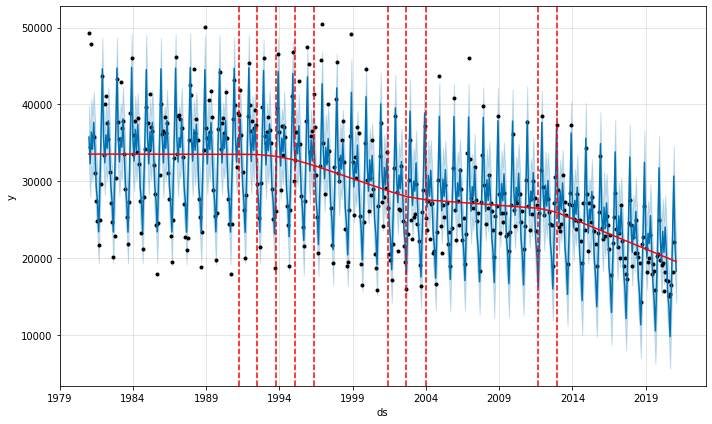

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), model, forecast_data)

In [ ]:
model =  Prophet.Prophet(changepoint_prior_scale=10, changepoints = ['2020-01-25','2020-02-29'],yearly_seasonality=10,weekly_seasonality=False,daily_seasonality=False, growth='linear') 
model.add_country_holidays(country_name='KR')
model.fit(df);
past = model.make_future_dataframe(periods=0, freq='M')
future_data = pd.DataFrame(['2021-01-01','2021-02-01'], columns=['ds']).astype( 'datetime64[ns]')
future_data = pd.concat([past,future_data],axis=0)
forecast_data = model.predict(future_data)

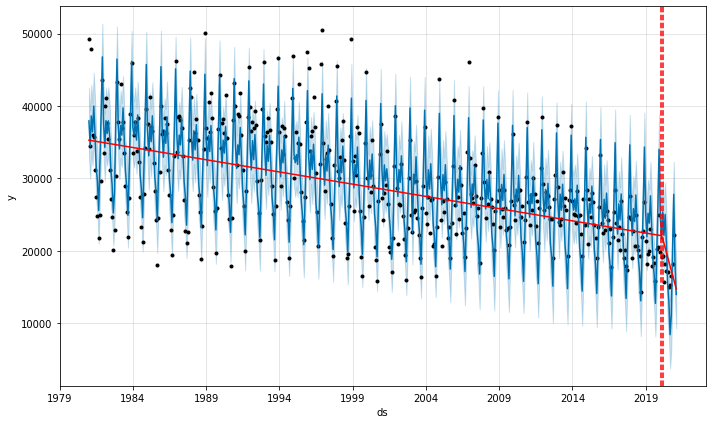

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), model, forecast_data)

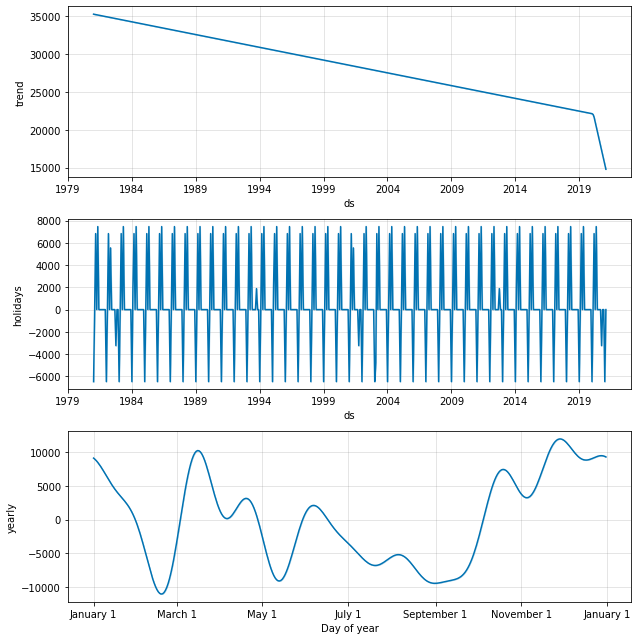

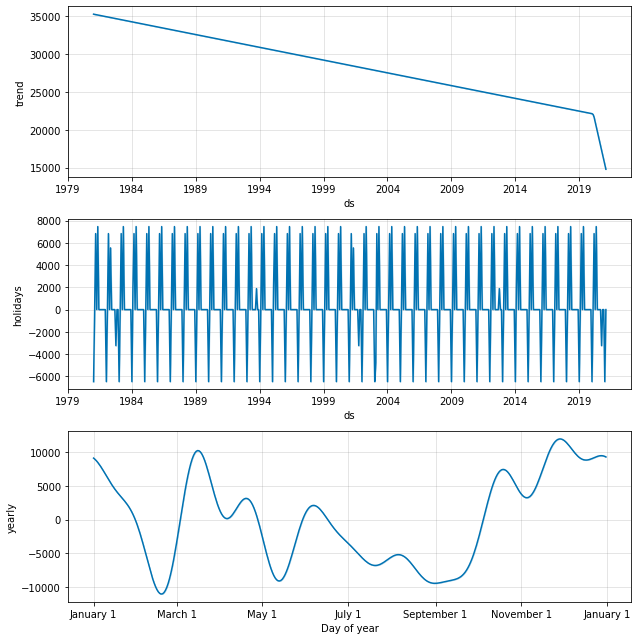

In [ ]:
model.plot_components(forecast_data)

In [ ]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,Alternative holiday of Children's Day_upper,Alternative holiday of Chuseok,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,35287.203071,33030.505002,42566.806954,35287.203071,35287.203071,0.0,0.0,0.0,0.0,...,-6483.529200,-6483.529200,-6483.529200,9144.004525,9144.004525,9144.004525,0.0,0.0,0.0,37947.678396
1,1981-02-01,35258.561767,29945.698522,39362.247539,35258.561767,35258.561767,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-785.002325,-785.002325,-785.002325,0.0,0.0,0.0,34473.559442
2,1981-03-01,35232.692201,33800.522023,42951.001778,35232.692201,35232.692201,0.0,0.0,0.0,0.0,...,6836.516947,6836.516947,6836.516947,-3429.880256,-3429.880256,-3429.880256,0.0,0.0,0.0,38639.328893
3,1981-04-01,35204.050897,31747.506906,40422.425984,35204.050897,35204.050897,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1220.190260,1220.190260,1220.190260,0.0,0.0,0.0,36424.241157
4,1981-05-01,35176.333506,35361.854171,44590.657645,35176.333506,35176.333506,0.0,0.0,0.0,0.0,...,7468.750697,7468.750697,7468.750697,-2640.981633,-2640.981633,-2640.981633,0.0,0.0,0.0,40004.102570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2020-10-01,17287.945504,6305.747474,15473.158237,17287.945504,17287.945504,0.0,0.0,0.0,0.0,...,-3246.540455,-3246.540455,-3246.540455,-2944.903655,-2944.903655,-2944.903655,0.0,0.0,0.0,11096.501394
478,2020-11-01,16654.059791,15658.764318,25343.765890,16654.059791,16654.059791,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,3700.357614,3700.357614,3700.357614,0.0,0.0,0.0,20354.417405
479,2020-12-01,16040.622005,23165.008495,32336.709314,16040.622005,16040.622005,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,11773.973186,11773.973186,11773.973186,0.0,0.0,0.0,27814.595191
480,2021-01-01,15406.736293,13505.048494,22767.621962,15406.736293,15406.736293,0.0,0.0,0.0,0.0,...,-6483.529200,-6483.529200,-6483.529200,9144.004525,9144.004525,9144.004525,0.0,0.0,0.0,18067.211617


In [ ]:
# 16280, 14972

# 2023년 예측

In [ ]:
past = model.make_future_dataframe(periods=0, freq='M')
future_data = pd.DataFrame(['2023-01-01','2023-02-01'], columns=['ds']).astype( 'datetime64[ns]')
future_data = pd.concat([past,future_data],axis=0)
forecast_data = model.predict(future_data)

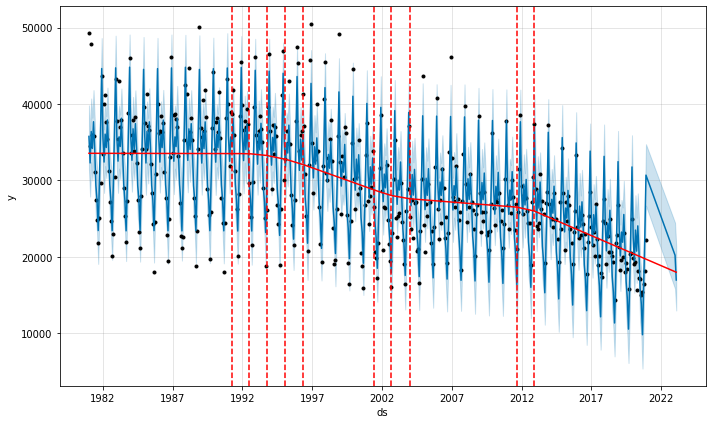

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), model, forecast_data)

In [ ]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,33539.762248,31504.906223,39820.739375,33539.762248,33539.762248,2210.980167,2210.980167,2210.980167,2210.980167,2210.980167,2210.980167,0.0,0.0,0.0,35750.742415
1,1981-02-01,33539.577638,27875.662173,36620.201002,33539.577638,33539.577638,-1261.950386,-1261.950386,-1261.950386,-1261.950386,-1261.950386,-1261.950386,0.0,0.0,0.0,32277.627253
2,1981-03-01,33539.410894,32385.697762,40715.792703,33539.410894,33539.410894,2861.896705,2861.896705,2861.896705,2861.896705,2861.896705,2861.896705,0.0,0.0,0.0,36401.307599
3,1981-04-01,33539.226285,29972.825186,38200.331357,33539.226285,33539.226285,636.065800,636.065800,636.065800,636.065800,636.065800,636.065800,0.0,0.0,0.0,34175.292084
4,1981-05-01,33539.047630,33212.152136,41814.544873,33539.047630,33539.047630,4132.396167,4132.396167,4132.396167,4132.396167,4132.396167,4132.396167,0.0,0.0,0.0,37671.443798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2020-10-01,19815.758185,11992.916939,20400.647205,19815.758185,19815.758185,-3755.294482,-3755.294482,-3755.294482,-3755.294482,-3755.294482,-3755.294482,0.0,0.0,0.0,16060.463703
478,2020-11-01,19748.951018,18643.292124,26828.191253,19748.951018,19748.951018,3002.769405,3002.769405,3002.769405,3002.769405,3002.769405,3002.769405,0.0,0.0,0.0,22751.720423
479,2020-12-01,19684.298920,26695.087307,34728.636560,19684.298920,19684.298920,10996.128767,10996.128767,10996.128767,10996.128767,10996.128767,10996.128767,0.0,0.0,0.0,30680.427687
480,2023-01-01,18044.290714,15819.413422,24456.019971,17895.240769,18184.798059,2151.666765,2151.666765,2151.666765,2151.666765,2151.666765,2151.666765,0.0,0.0,0.0,20195.957479
